In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [123]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [124]:
train_data.info()
print '---------------------------------------------------'
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         4

In [125]:
titanic_train_data = train_data.drop(['PassengerId','Name','Ticket'],1)
titanic_test_data = test_data.drop(['Name','Ticket'],1)

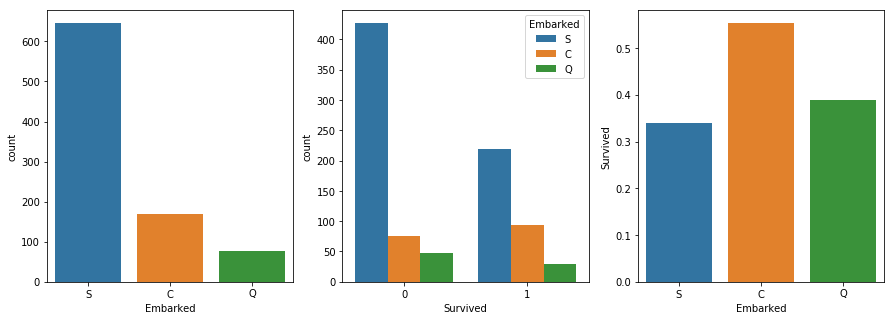

In [126]:
# Embarked
# Observation : Embarked at C port has average chance of survival(~0.6)
titanic_train_data['Embarked'] = titanic_train_data['Embarked'].fillna('S')
titanic_test_data['Embarked'] = titanic_test_data['Embarked'].fillna('S')
fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked',data = titanic_train_data, ax=axis1)
sns.countplot(x='Survived', hue = 'Embarked', data=titanic_train_data, ax=axis2)
embarked_survived = titanic_train_data[['Embarked','Survived']].groupby('Embarked', as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data = embarked_survived, order=['S','C','Q'])
#titanic_train_data.head(20)

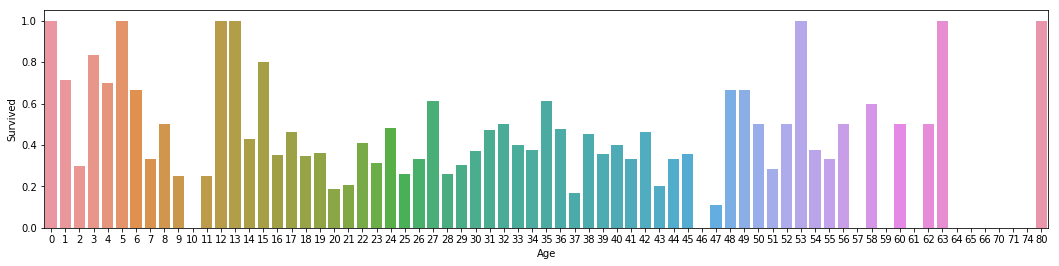

In [127]:
#Age
#Observation : <15 and >50 has higher chance of survival
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
titanic_train_data['Age'] = titanic_train_data['Age'].fillna(titanic_train_data.Age.mean())
titanic_test_data['Age'] = titanic_test_data['Age'].fillna(titanic_test_data.Age.mean())
titanic_train_data['Age'] = titanic_train_data['Age'].astype(int)
titanic_test_data['Age'] = titanic_test_data['Age'].astype(int)
age_survived = titanic_train_data[['Age','Survived']].groupby('Age',as_index=False).mean()
sns.barplot(x='Age',y='Survived',data=age_survived)
#titanic_train_data.head(20)

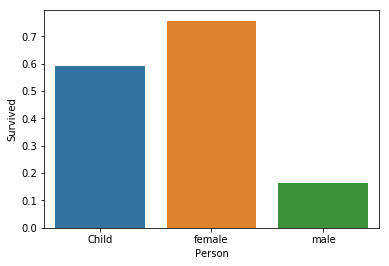

In [128]:
#Sex
#Observation : Female has good chances of survival
def isChild(passenger):
    age,sex = passenger
    if age<=15:
        return 'Child'
    return sex
titanic_train_data['Person']=titanic_train_data[['Age','Sex']].apply(isChild,axis=1)
titanic_test_data['Person'] =titanic_test_data[['Age','Sex']].apply(isChild,axis=1)
titanic_train_data = titanic_train_data.drop('Sex',axis=1)
titanic_test_data = titanic_test_data.drop('Sex',axis=1)
sex_survived = titanic_train_data[['Person','Survived']].groupby('Person',as_index=False).mean()
sns.barplot(x='Person',y='Survived',data=sex_survived)

In [129]:
#Cabin
titanic_train_data = titanic_train_data.drop('Cabin',axis=1)
titanic_test_data = titanic_test_data.drop('Cabin',axis=1)
#titanic_train_data.head(20)

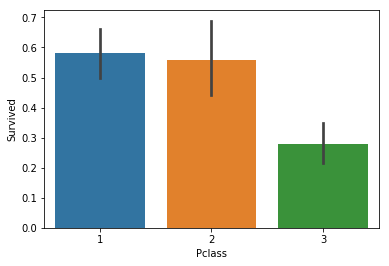

In [130]:
#pclass
#Pclass 1 and 2 have average chances of survival
pclassFare_survived = titanic_train_data[['Pclass','Fare','Survived']].groupby(['Pclass','Fare'],as_index=False).mean()
sns.barplot(x='Pclass',y='Survived',data=pclassFare_survived)
#titanic_train_data.head(20)

In [131]:
#Fare
#Greater the fare greater the chances of survival
titanic_test_data['Fare'] = titanic_test_data['Fare'].fillna(titanic_test_data.Fare.median())
fare_survived = titanic_train_data['Fare'][titanic_train_data['Survived']==1].mean()
fare_not_survived = titanic_train_data['Fare'][titanic_train_data['Survived']==0].mean()
print fare_survived, fare_not_survived

48.3954076023 22.1178868852


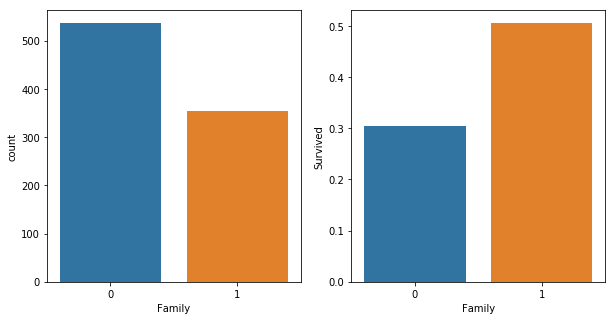

In [132]:
#Family
#Family person will have average chance of survival
titanic_train_data['Family'] = titanic_train_data['Parch'] + titanic_train_data['SibSp']
titanic_train_data['Family'].loc[titanic_train_data['Family']>0] = 1
titanic_train_data['Family'].loc[titanic_train_data['Family']==0] = 0
titanic_train_data = titanic_train_data.drop(['Parch','SibSp'],axis=1)

titanic_test_data['Family'] = titanic_test_data['Parch'] + titanic_test_data['SibSp']
titanic_test_data['Family'].loc[titanic_test_data['Family']>0] = 1
titanic_test_data['Family'].loc[titanic_test_data['Family']==0] = 0
titanic_test_data = titanic_test_data.drop(['Parch','SibSp'],axis=1)

family_survived = titanic_train_data[['Family','Survived']].groupby(['Family'],as_index=False).mean()
figure,(axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Family',data=titanic_train_data,ax=axis1)
sns.barplot(x='Family', y='Survived', data=family_survived)
#titanic_train_data.head(20)

In [133]:
map_person = {'male':0,'female':1,'Child':2}
map_embarked = {'S':0,'C':1,'Q':2}

titanic_train_data['Person'] = titanic_train_data['Person'].replace(map_person).convert_objects(convert_numeric=True)
titanic_train_data['Embarked'] = titanic_train_data['Embarked'].replace(map_embarked).convert_objects(convert_numeric=True)

titanic_test_data['Person'] = titanic_test_data['Person'].replace(map_person).convert_objects(convert_numeric=True)
titanic_test_data['Embarked'] = titanic_test_data['Embarked'].replace(map_embarked).convert_objects(convert_numeric=True)

/home/maulik/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
/home/maulik/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """
/home/maulik/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys
/home/maulik/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [134]:
x_train = titanic_train_data.drop('Survived',1)
y_train = titanic_train_data['Survived']
x_test = titanic_test_data.drop(['PassengerId'],1)

In [136]:
#Logistic Regression CV
#logreg = LogisticRegressionCV(Cs = [0.001,0.01,0.1,1,10,100])
#logreg.fit(x_train,y_train)
#y_test = logreg.predict(x_test)
#logreg.score(x_train,y_train)

0.79349046015712688

In [137]:
#SVM
#svc = SVC()
#svc.fit(x_train,y_train)
#y_test = svc.predict(x_test)
#svc.score(x_train,y_train)

0.89337822671156009

In [140]:
#RandomForest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_test = random_forest.predict(x_test)
accuracy_score(y_)

0.97643097643097643

In [148]:
#knn = KNeighborsClassifier(n_neighbors = 1)
#knn.fit(x_train, y_train)
#y_test = knn.predict(x_test)
#knn.score(x_train, y_train)

0.96857463524130194

In [149]:
# Gaussian Naive Bayes
#gaussian = GaussianNB()
#gaussian.fit(x_train, y_train)
#y_pred = gaussian.predict(x_test)
#gaussian.score(x_train, y_train)

0.72727272727272729

In [150]:
submission = pd.DataFrame({
        "PassengerId": titanic_test_data["PassengerId"],
        "Survived": y_test
    })
submission.to_csv('titanic.csv', index=False)